# Plotting Basics 
Let's start with importing some plotting functions (don't care about the warning ... we should use something else, but this is just easier, for the time being).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

#use a nicer plotting style
plt.style.use(u'seaborn-notebook')
print(plt.style.available)

Populating the interactive namespace from numpy and matplotlib
[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


(4000, 7000)

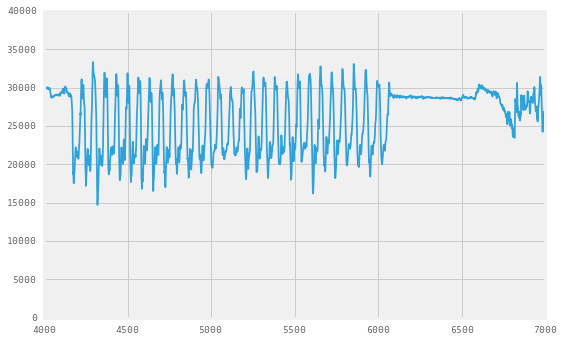

## Motion Data

The assembly.dat file contains a recording done from a assembly session.

A person was doing the following activities: 

* hammering in nails (label 1)
* screwdring (label 2)
* sandpapering (label 3)
* sawing (label 4)

Label 0 is for doing none of the activities above. The sensor is attached to the subjects right wrist (x axis pointing towards the fingers). 
The sensor was sampled with 100 Hz, it's raw sensor data (not calibrated). The data structure of the file is shown in the header of the file.

## Import the data

The file uses tabs as separators and we need to skip 11 rows (the description of the content). 
Also we need to give the desciription for each column in the names variable.

In [12]:
data = pd.read_csv('./data/assembly.dat',delimiter='\t',skiprows=11,names=['s','usec','ax','ay','az','gx','gy','gz','mx','my','mz','label'])

In [ ]:
#to get an overview of the data you can use describe in pandas
data.describe()

In [ ]:
data[['gx','gy','gz']].plot()

In [ ]:
data[['ax','ay','az']].plot()

In [ ]:
#simple line plot
plt.plot(data['ax'])
plt.xlim(4000,7000)

In [ ]:
fig= figure()
plot(data['ax'], label='acceleration x')
plot(data['gx'], label='gyrscope x')
legend(loc='upper right')

for more details on plotting options see also: http://matplotlib.org/users/pyplot_tutorial.html

We can change the size and DPI as follows:

## Histograms

In [ ]:
#to explore the hist command a bit more ... use this list
alist =[1,2,3,4,5,5,5,4,4,4,4,4,4,5,6,4,4,4,4,4,4,4,4,3,2,2,8,8,8]
hist(alist)

In [ ]:
#if you want to plot the density function with it ... pandas is nice:
d = pd.Series(alist)
d.hist()
d.plot(kind='kde', style='k--')


#try it with the gryo and accelerometer data

In [ ]:
data['ax'].plot(kind='kde', style='b--')
data['ay'].plot(kind='kde', style='g--')
data['az'].plot(kind='kde', style='r--')

try it with the gyroscope data ... what's the difference?

# Barcharts

In [ ]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")

In [ ]:
plt.barh(x, y, width, color="blue") 

# Feature Caluclation and Selection
In the next step we will take the gyro data and calculate some features on the them.

In [26]:
gyro_hammer = data[data['label']==1][['gx','gy','gz']]
gyro_screw = data[data['label']==2][['gx','gy','gz']]
gyro_sand = data[data['label']==3][['gx','gy','gz']]
gyro_saw = data[data['label']==4][['gx','gy','gz']]

In [ ]:
gyro_hammer.plot()
gyro_screw.plot()
gyro_sand.plot()
gyro_saw.plot()

In [31]:
#calculating a sliding window ...
from pandas.stats.moments import rolling_apply
print size(gyro_screw)/10.0

method = median
wsize = 10

feat1 = rolling_apply(gyro_screw, wsize, method).dropna()
feat2 = rolling_apply(gyro_hammer,wsize, method).dropna()
feat3 = rolling_apply(gyro_sand, wsize, method).dropna()
feat4 = rolling_apply(gyro_saw, wsize, method).dropna()

582.0


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	Da

In [ ]:
scatter(feat1['gz'], feat1['gy'])
scatter(feat2['gz'], feat2['gy'],color='red')
scatter(feat3['gz'], feat3['gy'],color='green')
scatter(feat4['gz'], feat4['gy'],color='yellow')

In [ ]:
#3d is usually worse but you can do also 3d plotd
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = figure(figsize=(14,6))
ax = axes(projection='3d')

ax.scatter(feat1['gx'], feat1['gy'], feat1['gz'])
ax.scatter(feat2['gx'], feat2['gy'], feat2['gz'],c='red')

# Only for advanced students: Classification
In the following we will try how good our features are to automatically classify the different activities.

In [34]:
#don't look here ... I split the data in test and training set
#bad code :)

l_1 = len(feat1)
l_2 = len(feat2)
l_3 = len(feat3)
l_4 = len(feat4)

#X = feat1.append(feat2).append(feat3).append(feat4)
#Y = [1.0] * l_1 + [2.0]* l_2 + [3] * l_3 + [4] * l_4

X = feat1[0:l_1/2].append(feat2[0:l_2/2]).append(feat3[0:l_3/2]).append(feat4[0:l_4/2])
Y = [1]*(l_1/2) + [2]*(l_2/2)+[3]*(l_3/2) + [4]*(l_4/2)

T = feat1[l_1/2:l_1].append(feat2[l_2/2:l_2]).append(feat3[l_3/2:l_3]).append(feat4[l_4/2:l_4])
t_gg = [1]*len(feat1[l_1/2:l_1]) + [2]*len(feat2[l_2/2:l_2]) + [3]*len(feat3[l_3/2:l_3]) + [4]*len(feat1[l_4/2:l_4])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier()

dt.fit(X,Y)
res = dt.predict(T)
plot(res+0.2, 'r.')
plot(t_gg, 'b.')


print dt.score(T, t_gg)




In [ ]:
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedKFold, cross_val_score

Xn, yn = shuffle(T, t_gg)
skf = StratifiedKFold(yn, 10)
print cross_val_score(dt, Xn, yn, cv=skf)